# Week 15: Script


## Table of Contents
- [0 - Packages](#0)
- [1 - Test Example](#1)
- [2 - The Loss Function](#2)
- [3 - Result](#3)
- [4 - Intuition of Angle Activation](#4)
- [5 - Problems](#5)
- [6 - Reference](#6)

<a name='0'></a>
## 0 - Package

In [14]:
# Packages
import time

# Self-defined functions
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))
from util.mesh.triangle.algorithm.R2.my_test import boundary_smoothing_tutte, poly_square_tutte

from util.pyvista_util import preprocess, postprocess

In [25]:
tritess_v, tritess_f = preprocess("./mesh/tritess/tritess_input.ply")

# Poly square mapping
tritess_test1 = poly_square_tutte(tritess_v.copy(), tritess_f.copy()
#                                  , max_iter=1
                                 )

# Boundary Deformation
start_time = time.time()
tritess_test1.optimize_default()
end_time = time.time()

t_boundary_deformation1 = end_time - start_time

# Inner vertices deformation
start_time = time.time()
tritess_test1.mapping()
end_time = time.time()

t_tutte1 = end_time - start_time

postprocess("./mesh/tritess/tritess_out_PolySquare.ply", tritess_test1.solution, tritess_f)

# Boundary smoothing
tritess_test2 = boundary_smoothing_tutte(tritess_v.copy(), tritess_f.copy()
#                                  , max_iter=1
                                 )

# Boundary Deformation
start_time = time.time()
tritess_test2.optimize_default()
end_time = time.time()

t_boundary_deformation2 = end_time - start_time

# Inner vertices deformation
start_time = time.time()
tritess_test2.mapping()
end_time = time.time()

t_tutte2 = end_time - start_time

postprocess("./mesh/tritess/tritess_out_BoundarySmoothing.ply", tritess_test2.solution, tritess_f)

In [26]:
print(t_boundary_deformation1, t_tutte1, t_boundary_deformation2, t_tutte2)

26.191330909729004 0.031258344650268555 7.869512557983398 0.03125643730163574


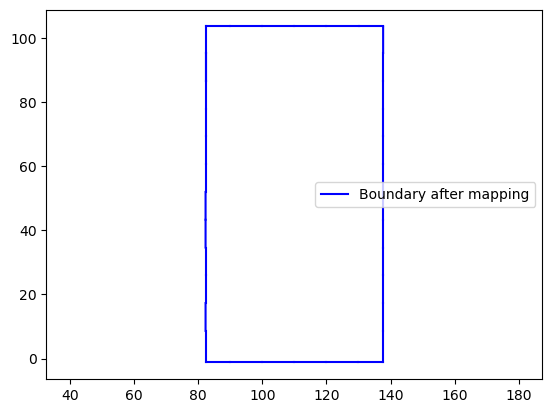

In [27]:
tritess_test1.v_plt()

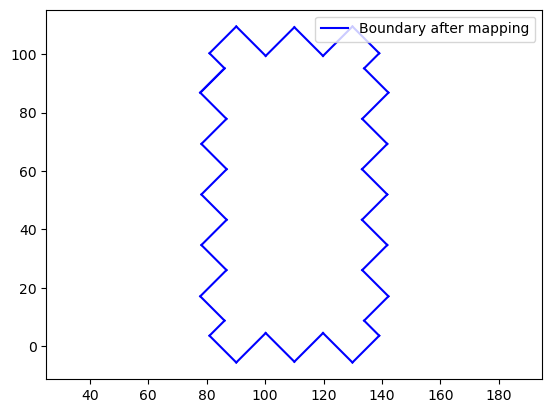

In [28]:
tritess_test2.v_plt()

<a name='1'></a>
## 1 - Test Example